В этом домашнем задании предлагается написать на торче линейную регрессию.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import torch

## Одномерный случай

Давайте начнем с одномерной линейной регрессии. 

In [6]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [7]:
x, y = make_regression(n_features=1, n_informative=1, noise=10)

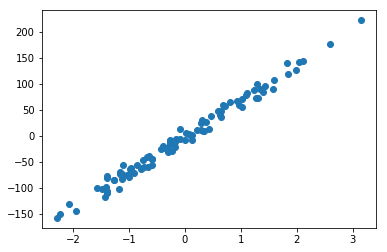

In [8]:
plt.scatter(x, y)

In [9]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y)

Одномерная линейная регрессия выглядит следующим образом: $$ y = w * x + b $$

Здесь $w$ и $b$ - параметры которые мы хотим настроить.

В torch все такие параметры должны быть torch тензорами.

#### План:
- Инициализировать случайные $w$ и $b$ - torch тензоры
- Переделать x_tr, x_te, y_tr, y_te в torch тензоры
- Задать функцию ошибки ( среднее квадратичное отклонение, MSE)
- Несколько эпох обновлять параметры $w$ и $b$, используя оптимизатор из торча (SGD) 


In [ ]:
w = *YOUR CODE HERE*
b = *YOUR CODE HERE*
x_tr = *YOUR CODE HERE*
x_te = *YOUR CODE HERE*
y_tr = *YOUR CODE HERE*
y_te = *YOUR CODE HERE*

Оптимизаторы в torch лежат в torch.optim. Используем SGD. На вход ему надо передать список или словарь тензоров, которые нужно обновлять, и learning rate ($\alpha$) $$ w^{t+1} = w^{t} - \alpha \frac{\partial L}{\partial w} $$

In [11]:
from torch.optim import SGD

In [ ]:
sgd = SGD(*YOUR CODE HERE*)

Разные функции ошибки есть в torch.nn. Нам нужна средне квадратичная ошибка. 

In [13]:
from torch.nn import MSELoss

In [14]:
loss_function = MSELoss()

В основном цикле обучения надо действовать следующим образом  (см ноутбук torch_intro)
- Пересчитать y_pred c учетом w и b
- Посчитать loss используя MSEloss(), и сохранить
- Посчитать производные $ \frac{\partial L}{\partial w} $ и $ \frac{\partial L}{\partial b} $. Для этого в torch есть функция backward(). Которую нужно вызвать от loss. 
- Сделать шаг обновлений используя sgd.step()
- Обнулить градиенты (потому что backward() их аккумулирует, а не обновляет)

- посчитать loss на тесте и сохранить

In [ ]:
n_epochs = 100
train_losses = []
test_losses = []


for e in range(n_epochs):
    y_pred = *YOUR CODE HERE*
    loss = *YOUR CODE HERE*
    train_losses.append(loss.item()) #эта строчка сохраняет величину лосс в список 
    
    loss.backward() #пересчитали производные
    
    sgd.step()
    sgd.zero_grad()
    
    test_loss = *YOUR CODE HERE*
    test_losses.append(test_loss.item())

1. Постройте графики ошибки на трейне и на тесте. 

2. Постройте график прямой на картинке с данными, убедитесь, что все ок

## 2 Ridge
Сделайте из обычной регрессии RIdge. Для этого нужно в  loss добавить квадраты настраиваемых параметров, с каким-нибудь коэффициентом.

In [ ]:
*YOUR CODE HERE*

## 3  Много параметрическая линейная регрессия
Обновите код, чтобы можно было сделать многопараметрическую регрессию.

In [15]:
n_features = 20

In [16]:
x, y = make_regression(n_samples=1000, n_features=n_features, n_informative=1, noise=10)

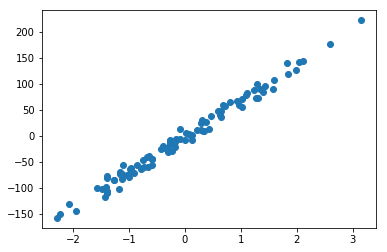

In [8]:
plt.scatter(x, y)

In [9]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y)

Теперь регрессия выглядит так $$ y = x * \theta^T + b $$

Где $b$ по прежнему одномерный, а $\theta$ имеет размерность количества фичей. 

$ x * \theta^T $ - это матричное умножение. В torch это будет выглядеть как x.mm(theta.T), где .mm - матрчиное умножение, а .T - транспонирование 

## 4 SGD
До этого мы использовали все данные, чтобы учиться на каждой эпохе (в каждом цикле). Сделайте так, чтобы внутри большого цикла был второй цикл, который разбивал данные на несколько пачек размером batch_size и проходил по ним другим циклом в случайном порядке. Для этого подойдет np.split и np.random.shuffle

In [ ]:
n_epochs = 100
batch_size = 
train_losses = []
test_losses = []


for e in range(n_epochs):
    batches = *YOUR CODE HERE*
    
    batch_losses = []
    for batch in batches:
        y_pred_batch = *YOUR CODE HERE*
        batch_loss = *YOUR CODE HERE*
        batch_losses.append(batch_loss.item()) #эта строчка сохраняет величину лосс в список 

        batch_loss.backward() #пересчитали производные

        sgd.step()
        sgd.zero_grad()

    train_losses.append(np.mean(batch_losses))
    
    test_loss = *YOUR CODE HERE*
    test_losses.append(test_loss.item())